# Brown e Cauchy

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Moto-Browniano" data-toc-modified-id="Moto-Browniano-1">Moto Browniano</a></span></li><li><span><a href="#Moto-di-Cauchy" data-toc-modified-id="Moto-di-Cauchy-2">Moto di Cauchy</a></span></li><li><span><a href="#Plot-finale" data-toc-modified-id="Plot-finale-3">Plot finale</a></span></li></ul></div>

In [1]:
using Random: rand
using Distributions: Normal, Cauchy
using Plots

T = 1
times = LinRange(0, T, 100)

100-element LinRange{Float64}:
 0.0,0.010101,0.020202,0.030303,0.040404,…,0.969697,0.979798,0.989899,1.0

In [2]:
Nt = length(times)
Np = 256 # number of paths

256

Parametri di diffusione: $ \mu $ , $ \sigma $ , $ \Delta t $

In [3]:
mu = 0.2;
sigma = 5.0
Dt = 0.1
stdev = sqrt(Dt)*sigma

1.5811388300841898

## Moto Browniano

Sostanzialmente si simula con una dist. Gaussiana $\mathcal{N}$ adesso:

$$ \Delta X=\mathit{\mathcal{N}}(\mu\Delta t,\sigma^{2}\Delta t) $$

In [4]:
X = zeros(Nt,Np)
d = Normal(mu, sigma)
for i in 1:Nt-1 # Ciclo in Julia
    X[i+1,:] = X[i,:] + rand(d, Np)
end

In [5]:
function plot_paths(X, step = 1)
    """ 
        plot all paths (step=1) or every step-th path
    """
    Np = size(X,2) # Come shape di Numpy
    x = zeros(Int128, 0)
    for i in 1:Np
        if i % step == 0
            push!( x, i )
        end
    end
    plot(times, X[:,x])
    xlabel!("t")
    ylabel!("x")
end

plot_paths (generic function with 2 methods)

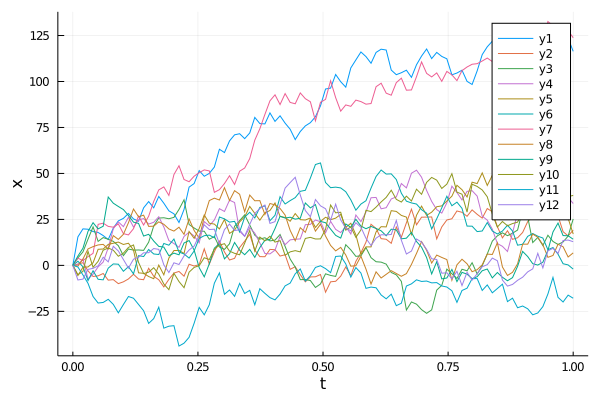

In [6]:
plot_paths(X, 20)

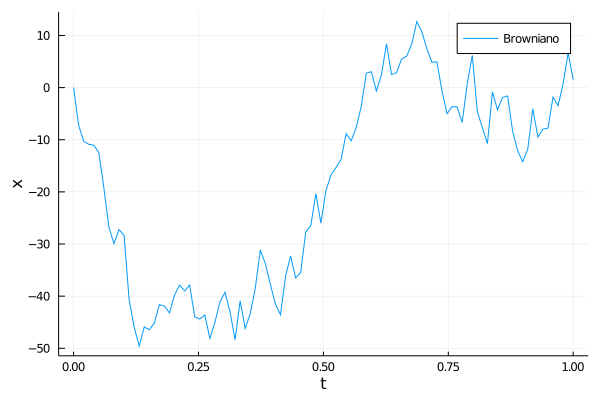

In [7]:
plot(times, X[:,190], label = "Browniano")
xlabel!("t")
ylabel!("x")

## Moto di Cauchy

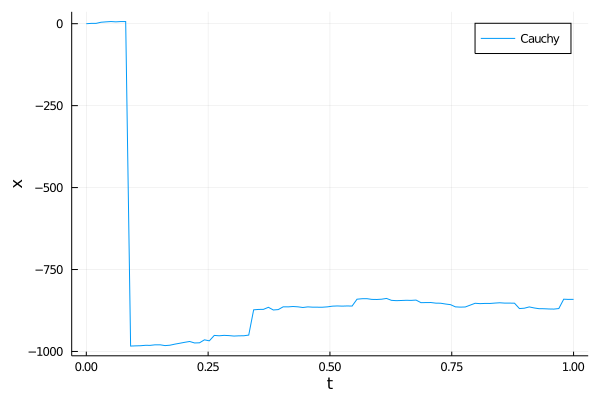

In [8]:
mu = 0;
sigma = 1
Dt = 0.1
stdev = sqrt(Dt)*sigma
X1 = zeros(Nt,Np)
d = Cauchy(mu, sigma)
for i in 1:Nt-1 # Ciclo in Julia
    X1[i+1,:] = X1[i,:] + rand(d, Np)
end
plot(times, X1[:,13], label = "Cauchy")
xlabel!("t")
ylabel!("x")

## Plot finale

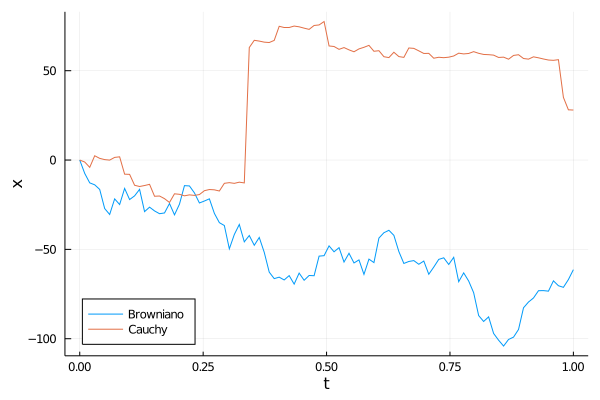

In [19]:
fig = plot(times, [X[:,9],X1[:,5]], label = ["Browniano" "Cauchy"], legend=:bottomleft)
xlabel!("t")
ylabel!("x")
#savefig(fig,"4_cauchy-brown.png")
fig